# Graph showing Goals Against and Expected Goals Against

## Imports

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import datetime
from highlight_text import HighlightText, ax_text, fig_text
import matplotlib.image as mpimg
from PIL import Image

## Retrieve data

In [2]:
data = pd.read_csv("../../data/defense/GoalsAgainst_xGA.csv")

In [3]:
data.head(5)

,Date,GA,xGA,num_match
0,2017-08-12,3,2.0,1
1,2017-08-19,0,0.5,2
2,2017-08-27,0,0.7,3
3,2017-09-09,5,2.8,4
4,2017-09-16,1,0.4,5


In [4]:
goals_against = data['GA'] 
xGA = data['xGA']
date_match = data['Date']
num_match = data ['num_match']

## Create the plot

### Calculate rolling average for our 2 features

In [5]:
data['10games_rolling_GA'] = data.GA.rolling(10).mean()
data['10games_rolling_xGA'] = data.xGA.rolling(10).mean()

In [6]:
GA_rolling = data['10games_rolling_GA']
xGA_rolling = data['10games_rolling_xGA']

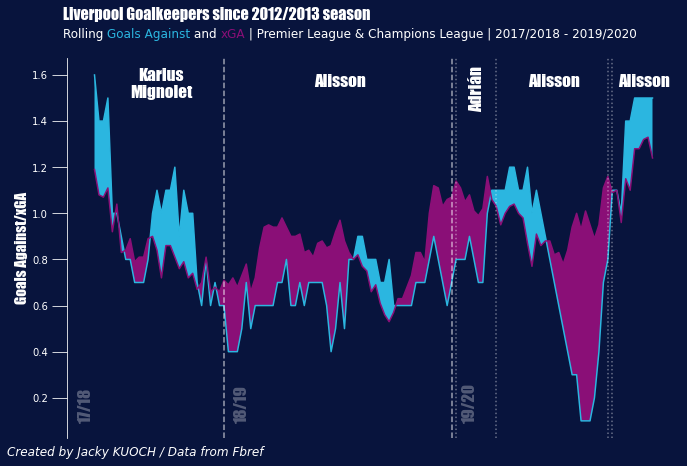

<Figure size 432x288 with 0 Axes>

In [7]:
fig,ax = plt.subplots(figsize = (11,7))

#Define a font
hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")
ax.set_zorder(1)

#Change the ticks color
ax.tick_params(colors="w", length=15, bottom=False, labelbottom = False)

#Change the axes color and hide some axes
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

# Plot the GA
plt.plot(num_match, GA_rolling , zorder=2, color="#2bb6e0", linewidth=1.5)

# Plot the xGA
plt.plot(num_match, xGA_rolling, zorder=2, color="#8A0F77", linewidth=1.5)

#Fill between axes to visualize difference between the two plots
ax.fill_between(num_match,GA_rolling, xGA_rolling, where=GA_rolling >= xGA_rolling, facecolor="#2bb6e0", interpolate=True)
ax.fill_between(num_match,GA_rolling, xGA_rolling, where=xGA_rolling >= GA_rolling, facecolor="#8A0F77", interpolate=True)

# Axes Label
plt.ylabel("Goals Against/xGA", color="w", fontsize=15 , **hfont)

# Title and credits
fig.text(0.12,0.92, "Liverpool Goalkeepers since 2012/2013 season\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
#Use highlighttext library to add color in our title
fig_text(x=0.12, y=0.94, s="Rolling <Goals Against> and <xGA> | Premier League & Champions League | 2017/2018 - 2019/2020", highlight_textprops=[{"color":"#2bb6e0"}, {'color':"#8A0F77"}], color="w", fontweight="light", fontsize=12, zorder=2)

fig.text(0.05, 0.09, "Created by Jacky KUOCH / Data from Fbref",fontstyle="italic",fontsize=12, color="w")

# Split the graph in seasons
# 17/18
first_season = ax.text(8, 0.1, "17/18", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)

# 18/19
second_season = ax.text(43, 0.1, "18/19", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
ax.axvline(x=39, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

#19/20
third_season = ax.text(94, 0.1, "19/20", fontsize=17, ha="center", color="w",alpha=0.3, rotation =90, **hfont)
ax.axvline(x=90, color="w", linestyle = "dashed", alpha=0.6 ,zorder=3)

# Split the graph in goalkeepers era
karius_mignolet = ax.text(25, 1.50, "Karius\nMignolet", fontsize=17, ha="center", color="w",alpha=1 , **hfont)
alisson_1 = ax.text(65, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

adrian = ax.text(95.5, 1.45, "Adrián", fontsize=17, ha="center", color="w",alpha=1 , rotation=90, **hfont)
ax.axvline(x=91, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
ax.axvline(x=100, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

alisson_2 = ax.text(113, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

ax.axvline(x=125, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)
ax.axvline(x=126, color="w", linestyle = "dotted", alpha=0.4 ,zorder=3, linewidth=1.5)

alisson_3 = ax.text(133, 1.55, "Alisson", fontsize=17, ha="center", color="w",alpha=1 , **hfont)

plt.show()
plt.tight_layout()